In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pylab
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

In [17]:
auto_data = pd.read_csv('data/cleaned_imports.csv', quotechar='"')
X = auto_data.drop('price', axis=1)
Y = auto_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
# Build the model

lasso_model = Lasso(alpha=5,normalize=True, tol=0.0005)
lasso_model.fit(X_train, y_train)

Lasso(alpha=5, normalize=True, tol=0.0005)

In [31]:
lasso_model.score(X_train, y_train)

0.9498874778299423

In [32]:
predictors = X_train.columns
coef = pd.Series(lasso_model.coef_, predictors).sort_values()
coef

engine-location_front    -7574.751567
bore                     -2327.051288
aspiration_std           -1327.261393
engine-type_ohcv         -1237.349756
fuel-system_mfi          -1227.112864
                             ...     
make_saab                 2727.126133
body-style_convertible    3176.616242
make_porsche              6512.452742
make_mercedes-benz        7813.797799
make_bmw                  8919.908981
Length: 72, dtype: float64

In [33]:
y_predict = lasso_model.predict(X_test)

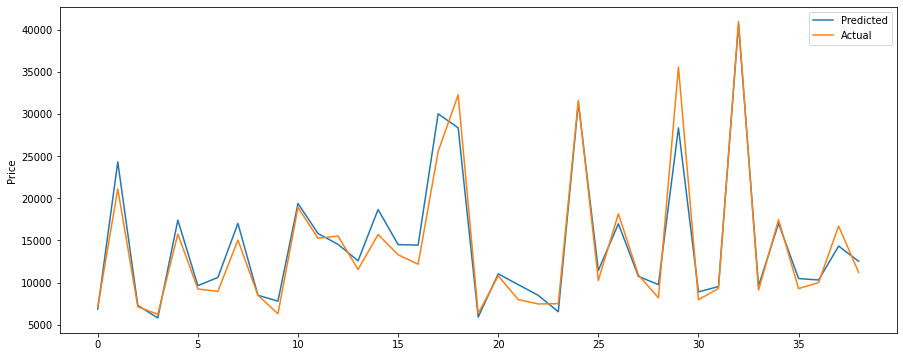

In [34]:
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
lasso_model.score(X_test, y_test)

0.946427535136952

In [36]:
lasso_mse = mean_squared_error(y_predict, y_test)

In [37]:
math.sqrt(lasso_mse)

1949.930506146544